In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install seaborn

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
import pandas as pd

In [4]:
import geopandas as gpd

In [ ]:
# !pip uninstall rtree

In [ ]:
!which jupyter

In [ ]:
!where python

In [5]:
import folium
from folium import plugins

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('bostoncrime.csv',encoding='ANSI')

In [9]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)"
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)"
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)"
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)"
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
303367,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303368,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303369,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [10]:
from sklearn.datasets import load_iris
data = load_iris()
data.target[[10, 25, 50]]

list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [11]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
from sklearn import linear_model
import statsmodels.api as sm

In [13]:
!pip install statsmodels

In [15]:
import numpy as np
import pandas as pd

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303371 entries, 0 to 303370
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      303371 non-null  object 
 1   OFFENSE_CODE         303371 non-null  int64  
 2   OFFENSE_CODE_GROUP   303371 non-null  object 
 3   OFFENSE_DESCRIPTION  303371 non-null  object 
 4   DISTRICT             301728 non-null  object 
 5   REPORTING_AREA       303371 non-null  object 
 6   SHOOTING             969 non-null     object 
 7   OCCURRED_ON_DATE     303371 non-null  object 
 8   YEAR                 303371 non-null  int64  
 9   MONTH                303371 non-null  int64  
 10  DAY_OF_WEEK          303371 non-null  object 
 11  HOUR                 303371 non-null  int64  
 12  UCR_PART             303281 non-null  object 
 13  STREET               292753 non-null  object 
 14  Lat                  284532 non-null  float64
 15  Long             

In [18]:
df.shape

(303371, 17)

In [20]:
a = df.isna().sum()

In [22]:
for c,name in zip(a,a.index):
    print(name,'->>',c*100/len(df))

INCIDENT_NUMBER ->> 0.0
OFFENSE_CODE ->> 0.0
OFFENSE_CODE_GROUP ->> 0.0
OFFENSE_DESCRIPTION ->> 0.0
DISTRICT ->> 0.5415811003688553
REPORTING_AREA ->> 0.0
SHOOTING ->> 99.68058911365951
OCCURRED_ON_DATE ->> 0.0
YEAR ->> 0.0
MONTH ->> 0.0
DAY_OF_WEEK ->> 0.0
HOUR ->> 0.0
UCR_PART ->> 0.029666645790138148
STREET ->> 3.500004944440965
Lat ->> 6.209888222671251
Long ->> 6.209888222671251
Location ->> 0.0


In [26]:
b = a[a<len(df)*20/100]

In [24]:
len(df)*20/100

60674.2

In [27]:
b.index

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location'],
      dtype='object')

In [30]:
df = df[b.index].dropna()

In [31]:
df.isna().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [32]:
a

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1643
REPORTING_AREA              0
SHOOTING               302402
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10618
Lat                     18839
Long                    18839
Location                    0
dtype: int64

In [35]:
a = df['OFFENSE_CODE_GROUP'].value_counts()

In [38]:
list(a)[:10]

[28945, 23740, 21270, 17130, 16236, 14215, 14108, 13801, 12233, 10128]

In [39]:
list(a)

[28945,
 23740,
 21270,
 17130,
 16236,
 14215,
 14108,
 13801,
 12233,
 10128,
 10058,
 9697,
 8756,
 7121,
 6861,
 5378,
 5327,
 4814,
 4647,
 4259,
 4052,
 3770,
 3623,
 3412,
 2950,
 2385,
 2297,
 1768,
 1603,
 1516,
 1497,
 1361,
 1285,
 1250,
 926,
 910,
 905,
 898,
 898,
 888,
 829,
 635,
 510,
 507,
 456,
 433,
 367,
 282,
 251,
 215,
 193,
 141,
 125,
 87,
 85,
 67,
 30,
 30,
 21,
 8,
 4,
 2,
 2]

In [42]:
th = len(df)/63

In [47]:
for c, name in zip(a,a.index):
    print("{:<40} {:<10}".format(name,c))

Motor Vehicle Accident Response          28945     
Larceny                                  23740     
Medical Assistance                       21270     
Investigate Person                       17130     
Other                                    16236     
Vandalism                                14215     
Simple Assault                           14108     
Drug Violation                           13801     
Verbal Disputes                          12233     
Towed                                    10128     
Investigate Property                     10058     
Larceny From Motor Vehicle               9697      
Property Lost                            8756      
Warrant Arrests                          7121      
Aggravated Assault                       6861      
Residential Burglary                     5378      
Fraud                                    5327      
Violations                               4814      
Missing Person Located                   4647      
Auto Theft  

In [49]:
a[a>=th]

Motor Vehicle Accident Response    28945
Larceny                            23740
Medical Assistance                 21270
Investigate Person                 17130
Other                              16236
Vandalism                          14215
Simple Assault                     14108
Drug Violation                     13801
Verbal Disputes                    12233
Towed                              10128
Investigate Property               10058
Larceny From Motor Vehicle          9697
Property Lost                       8756
Warrant Arrests                     7121
Aggravated Assault                  6861
Residential Burglary                5378
Fraud                               5327
Violations                          4814
Missing Person Located              4647
Name: OFFENSE_CODE_GROUP, dtype: int64

In [50]:
# assign crime name, merge
# else other
one hot encoding of features , get_dummies
- neumeric encoding for Target
- build the model
- check performance
- tune the model performance





In [61]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)"
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)"
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)"
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)"
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
303367,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303368,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303369,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [ ]:
DISTRICT

In [64]:
pd.get_dummies(df,columns=['DISTRICT'])

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,...,DISTRICT_A7,DISTRICT_B2,DISTRICT_B3,DISTRICT_C11,DISTRICT_C6,DISTRICT_D14,DISTRICT_D4,DISTRICT_E13,DISTRICT_E18,DISTRICT_E5
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,428,2018-07-10 20:57:00,2018,7,Tuesday,20,...,0,0,1,0,0,0,0,0,0,0
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,481,2018-07-10 21:16:00,2018,7,Tuesday,21,...,0,0,0,0,0,0,0,0,1,0
2,I182054378,619,Larceny,LARCENY ALL OTHERS,182,2018-07-10 21:27:00,2018,7,Tuesday,21,...,0,1,0,0,0,0,0,0,0,0
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,714,2018-07-10 18:39:00,2018,7,Tuesday,18,...,0,0,0,0,0,0,0,0,0,1
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,211,2018-07-10 20:11:00,2018,7,Tuesday,20,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,285,2016-06-05 17:25:00,2016,6,Sunday,17,...,0,0,0,0,0,0,1,0,0,0
303367,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",520,2015-07-09 13:38:00,2015,7,Thursday,13,...,0,0,0,0,0,0,0,0,1,0
303368,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,520,2015-07-09 13:38:00,2015,7,Thursday,13,...,0,0,0,0,0,0,0,0,1,0
303369,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,569,2016-05-31 19:35:00,2016,5,Tuesday,19,...,0,0,0,0,0,0,0,1,0,0


In [53]:
df['DISTRICT'].value_counts()

B2     44076
C11    38764
D4     36461
B3     32010
A1     30315
C6     20528
D14    18180
E18    15752
E13    15744
A7     12477
E5     11985
A15     5906
Name: DISTRICT, dtype: int64

In [52]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [54]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)"
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)"
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)"
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)"
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
303367,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303368,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303369,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [56]:
df['INCIDENT_NUMBER'].value_counts()

I162030584    12
I152080623    11
I172096394    10
I172013170    10
I162071327     9
              ..
I172048019     1
I172048018     1
I172048017     1
I172048016     1
142052550      1
Name: INCIDENT_NUMBER, Length: 250549, dtype: int64

In [57]:
list(df)

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location']

In [58]:
dataset = pd.read_csv()

# preprocessing

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

### this code
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [74]:
import IPython

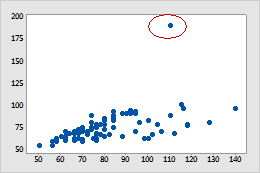

In [73]:
from IPython.display import Image
Image(filename = 'outlier_scatterplot.png')

In [70]:
!pip install Ipython

# df = pd.read_csv('bostoncrime.csv',encoding='ANSI')

In [1]:
import pandas as pd
df = pd.read_csv('crime.csv',encoding='ANSI')

In [2]:
list(df)

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'SHOOTING',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location']

In [3]:
df['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              35342
Larceny                                      24534
Medical Assistance                           22351
Investigate Person                           17867
Other                                        17223
                                             ...  
Manslaughter                                     6
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [4]:
df[df['OFFENSE_CODE_GROUP']=='Motor Vehicle Accident Response']['OFFENSE_DESCRIPTION'].value_counts()

M/V - LEAVING SCENE - PROPERTY DAMAGE              15556
M/V ACCIDENT - PROPERTY  DAMAGE                     6225
M/V ACCIDENT - PERSONAL INJURY                      4913
M/V ACCIDENT - OTHER                                2747
M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY          1582
M/V - LEAVING SCENE - PERSONAL INJURY               1224
M/V ACCIDENT - INVOLVING  BICYCLE - INJURY           860
M/V ACCIDENT - POLICE VEHICLE                        735
M/V ACCIDENT - OTHER CITY VEHICLE                    698
M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY         407
M/V ACCIDENT - INVOLVING PEDESTRIAN - NO INJURY      395
Name: OFFENSE_DESCRIPTION, dtype: int64

In [ ]:
serious and non serious



In [5]:
list(df['OFFENSE_CODE_GROUP'].value_counts().index)

['Motor Vehicle Accident Response',
 'Larceny',
 'Medical Assistance',
 'Investigate Person',
 'Other',
 'Drug Violation',
 'Simple Assault',
 'Vandalism',
 'Verbal Disputes',
 'Towed',
 'Investigate Property',
 'Larceny From Motor Vehicle',
 'Property Lost',
 'Warrant Arrests',
 'Aggravated Assault',
 'Violations',
 'Fraud',
 'Residential Burglary',
 'Missing Person Located',
 'Auto Theft',
 'Robbery',
 'Harassment',
 'Property Found',
 'Missing Person Reported',
 'Confidence Games',
 'Police Service Incidents',
 'Disorderly Conduct',
 'Fire Related Reports',
 'Firearm Violations',
 'License Violation',
 'Restraining Order Violations',
 'Counterfeiting',
 'Recovered Stolen Property',
 'Commercial Burglary',
 'Auto Theft Recovery',
 'Liquor Violation',
 'Ballistics',
 'Search Warrants',
 'Assembly or Gathering Violations',
 'Landlord/Tenant Disputes',
 'Property Related Damage',
 'Firearm Discovery',
 'Operating Under the Influence',
 'License Plate Related Incidents',
 'Offenses Again

In [6]:
serious = ['Motor Vehicle Accident Response',               
'Larceny',                                       
'Medical Assistance'  ,                          
'Vandalism',                                     
'Drug Violation' ,                               
'Larceny From Motor Vehicle' ,                    
'Aggravated Assault'   ,                          
'Residential Burglary' ,                          
'Fraud'                ,                          
'Auto Theft'    ,                                 
'Robbery'  ,                                      
'Missing Person Reported'   ,                     
'Fire Related Reports'   ,                        
'Firearm Violations' ,                            
'Commercial Burglary'  ,                          
'Ballistics'       ,                               
'Property Related Damage'  ,                       
'Firearm Discovery',                              
'Offenses Against Child / Family',                 
'Prisoner Related Incidents'   ,                   
'Prostitution'       ,                             
'Homicide'    ,                                    
'Criminal Harassment'  ,                           
'Arson'    ,                                        
'Bomb Hoax'  ,                                      
'Aircraft'  ,                                       
'Explosives'      ,                                 
'Manslaughter'   ,                                   
'Biological Threat'  ]                               

In [7]:
nonserious = ['Investigate Person  ',                          
'Other '         ,                               

'Simple Assault   '  ,                           

'Verbal Disputes  ' ,                            
'Towed  '         ,                              
'Investigate Property  '  ,                      

'Property Lost  ' ,                               
'Warrant Arrests '   ,                            



'Violations  '    ,                               
'Missing Person Located'  ,                   


'Harassment'  ,                                   
'Property Found'     ,                            
'Confidence Games '   ,                           
'Police Service Incidents '  ,                    
'Disorderly Conduct'     ,                        

'License Violation'  ,                            

'Restraining Order Violations  '  ,               
'Counterfeiting '    ,                            

'Recovered Stolen Property ' ,                    
'Auto Theft Recovery' ,                            
'Liquor Violation      ' ,                         
'Search Warrants   '   ,                           
'Landlord/Tenant Disputes    ' ,                   

'Assembly or Gathering Violations  ' ,             


'License Plate Related Incidents '  ,              

'Operating Under the Influence   ' ,               
'Other Burglary '   ,                              
'Evading Fare '   ,                                
'Embezzlement '  ,                                 
'Service       '   ,                               





'Harbor Related Incidents  ' ,                      


'Phone Call Complaints '  ,                         

'Gambling  '   ,                                     


'Burglary - No Property Taken ']              


In [15]:
serious = [i.strip() for i in serious]
nonserious = [i.strip() for i in nonserious]

In [18]:
df['OFFENSE_CODE_GROUP'].head()

0         Verbal Disputes
1    Investigate Property
2                 Larceny
3                 Larceny
4                   Towed
Name: OFFENSE_CODE_GROUP, dtype: object

In [20]:
df['Target'] = df['OFFENSE_CODE_GROUP'].apply(lambda x: 1 if x in serious else 0)

In [22]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Target
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)",0
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)",0
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)",1
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)",1
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)",0
